# Modify Battery Storage Parameters Example
---
In this example, we will show how to modify the battery storage parameters in the hybrid plant simulation. The major change is from using the default dispatch which is a profit maximization objective function to a load following objective function. The load follow objective will minimize system operating costs while load following.

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
import numpy as np

from hopp import ROOT_DIR
from hopp.simulation import HoppInterface
from hopp.utilities import load_yaml
from hopp.simulation.technologies.sites import SiteInfo, flatirons_site
from hopp.simulation.technologies.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)


/Users/cirmas/workspace/HOPP/examples/workshop/log/hybrid_systems_2023-10-23T15.27.53.464813.log


### Set Site Information
Set wind and solar resource data at plant location and load pricing data. In this example, we use the Flatirons site as an example location.

**NOTE**: For a load following objective function the `desired_schedule` must be set.

In [2]:
DEFAULT_SOLAR_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "solar" / "35.2018863_-101.945027_psmv3_60_2012.csv"
DEFAULT_WIND_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "wind" / "35.2018863_-101.945027_windtoolkit_2012_60min_80m_100m.srw"
DEFAULT_PRICE_FILE = ROOT_DIR.parent / "resource_files" / "grid" / "pricing-data-2015-IronMtn-002_factors.csv"

baseload_limit_kw = float(30 * 1000)
baseload_percent = 95.0
DEFAULT_LOAD = baseload_limit_kw*np.ones((8760))/1000

site = SiteInfo(
        flatirons_site,
        solar_resource_file=DEFAULT_SOLAR_RESOURCE_FILE,
        wind_resource_file=DEFAULT_WIND_RESOURCE_FILE,
        grid_resource_file=DEFAULT_PRICE_FILE,
        desired_schedule=DEFAULT_LOAD,
        solar=True,
        wind=True,
        wave=False
    )

### Create the HOPP Model
To generate the HOPP Model, instantiate the `HoppInterface` class and supply the required YAML configuration.

`HOPPInterface` is capable of handling dictionary input as well as class instances. Here we demonstrate this by loading the YAML file as a dict, modifying it to include our site information, then passing it as an argument to `HoppInterface`. This is useful for programmatic configuration of simulation configs.

In [3]:
hopp_config = load_yaml("./inputs/04-load-following-battery.yaml")
# set SiteInfo instance
hopp_config["site"] = site

### Create the Simulation Model
Instantiate the `HoppInterface` class by providing our modified configuration dict.

In [4]:
hi = HoppInterface(hopp_config)

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [5]:
hi.simulate(project_life=20)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [6]:
hybrid_plant = hi.system

print("Output after losses over gross output:",
      hybrid_plant.wind.value("annual_energy") / hybrid_plant.wind.value("annual_gross_energy"))

# Save the outputs
annual_energies = hybrid_plant.annual_energies
npvs = hybrid_plant.net_present_values
revs = hybrid_plant.total_revenues

print("Annual Energies:")
print(annual_energies)

print("Net Present Values:")
print(npvs)

print("Total Revenues:")
print(revs)

Output after losses over gross output: 0.7996592849806018
Annual Energies:
{"pv": 104053614.17593749, "wind": 162478037.04632393, "battery": -889947.5845921439, "hybrid": 197981480.22635943}
Net Present Values:
{"pv": -34633452.62880054, "wind": -56732881.02892732, "battery": -33564723.353900954, "hybrid": -130197805.97581556}
Total Revenues:
{"pv": [0.0, 100822.81119202862, 101831.0393039489, 102849.3496969884, 103877.8431939583, 104916.62162589785, 105965.78784215686, 107025.44572057843, 108095.7001777842, 109176.65717956203, 110268.42375135767, 111371.10798887124, 112484.81906875994, 113609.66725944755, 114745.76393204203, 115893.22157136246, 117052.15378707607, 118222.67532494686, 119404.90207819629, 120598.95109897826, 121804.94060996805], "wind": [0.0, 159810.47720782636, 161408.58197990461, 163022.6677997037, 164652.89447770073, 166299.4234224777, 167962.41765670254, 169642.04183326953, 171338.4622516022, 173051.84687411823, 174782.3653428594, 176530.18899628802, 178295.49088625

### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

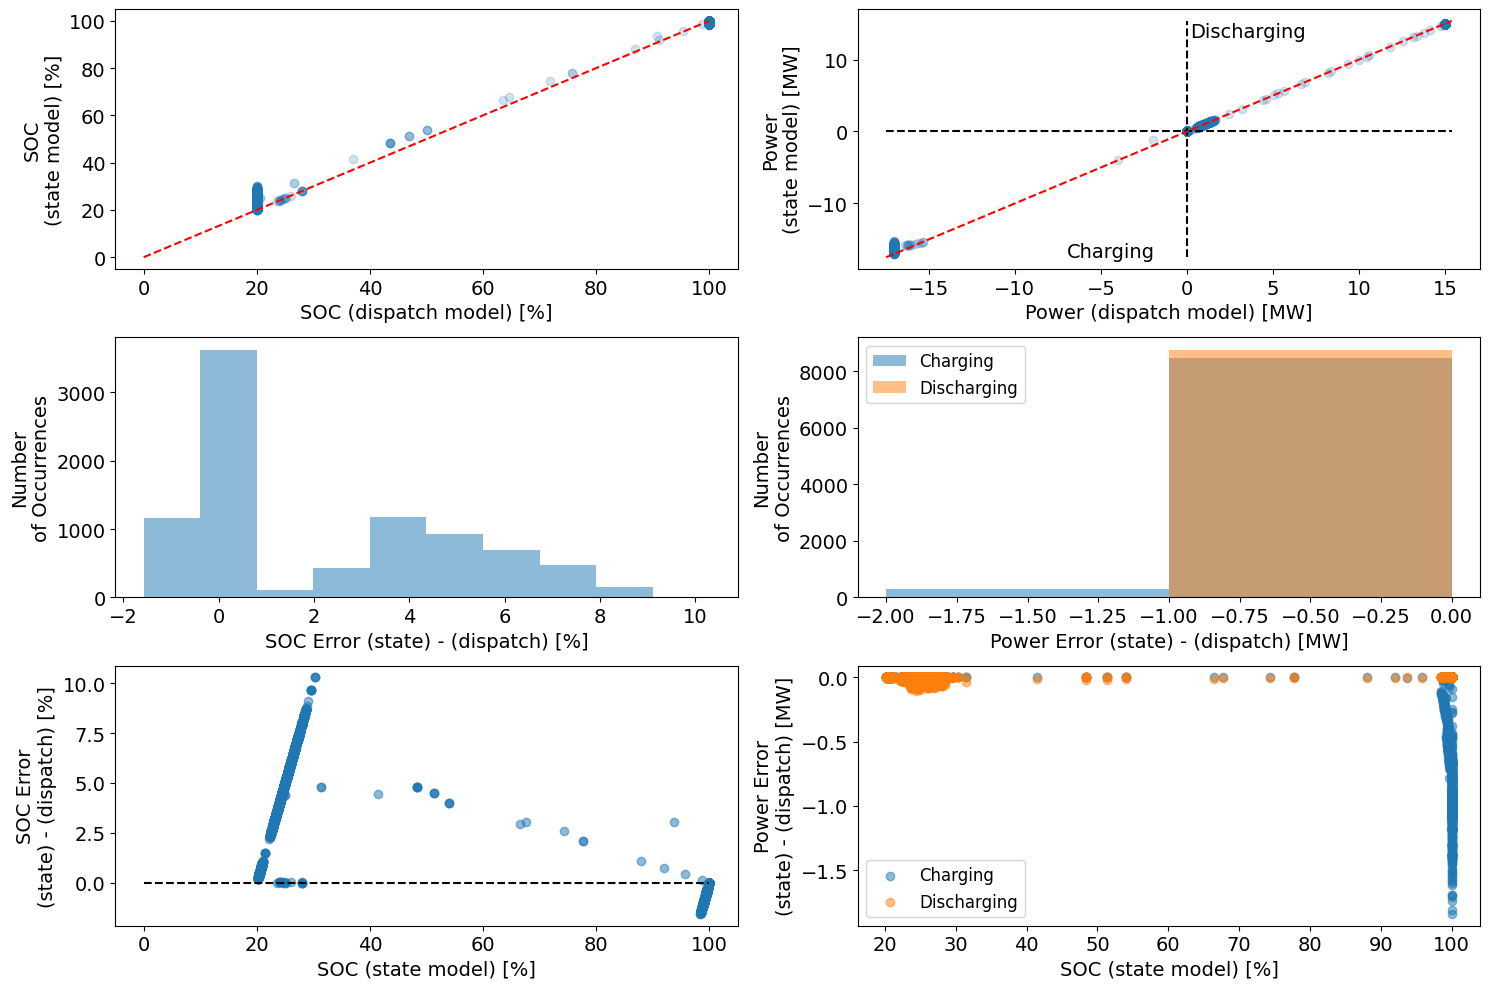

In [7]:
plot_battery_dispatch_error(hybrid_plant)

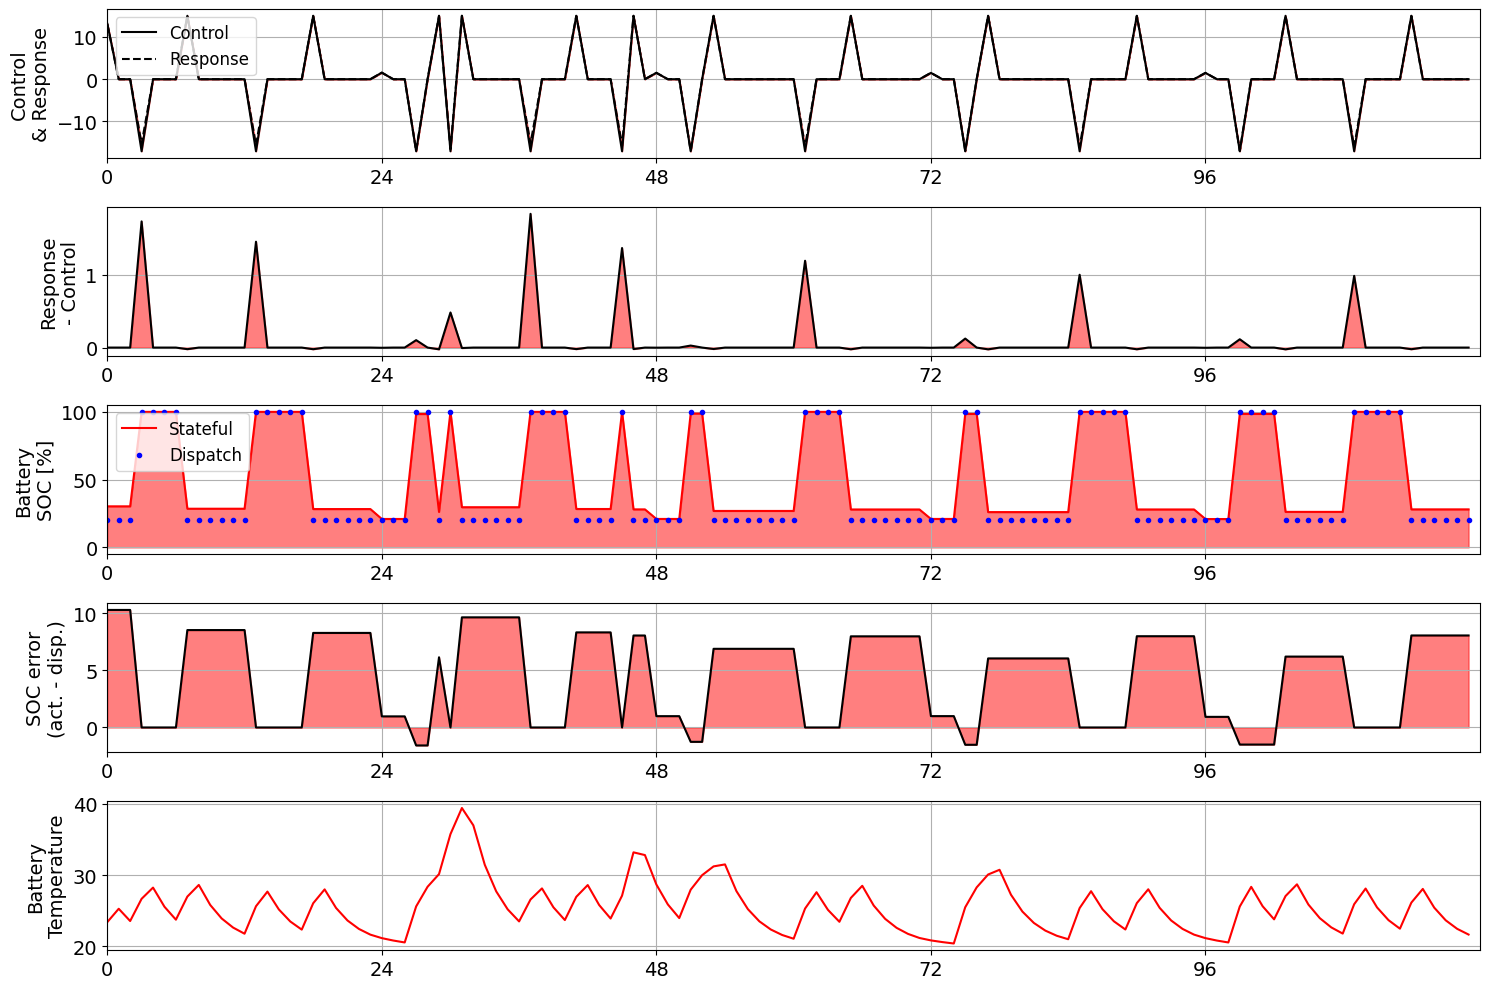

In [8]:
plot_battery_output(hybrid_plant)

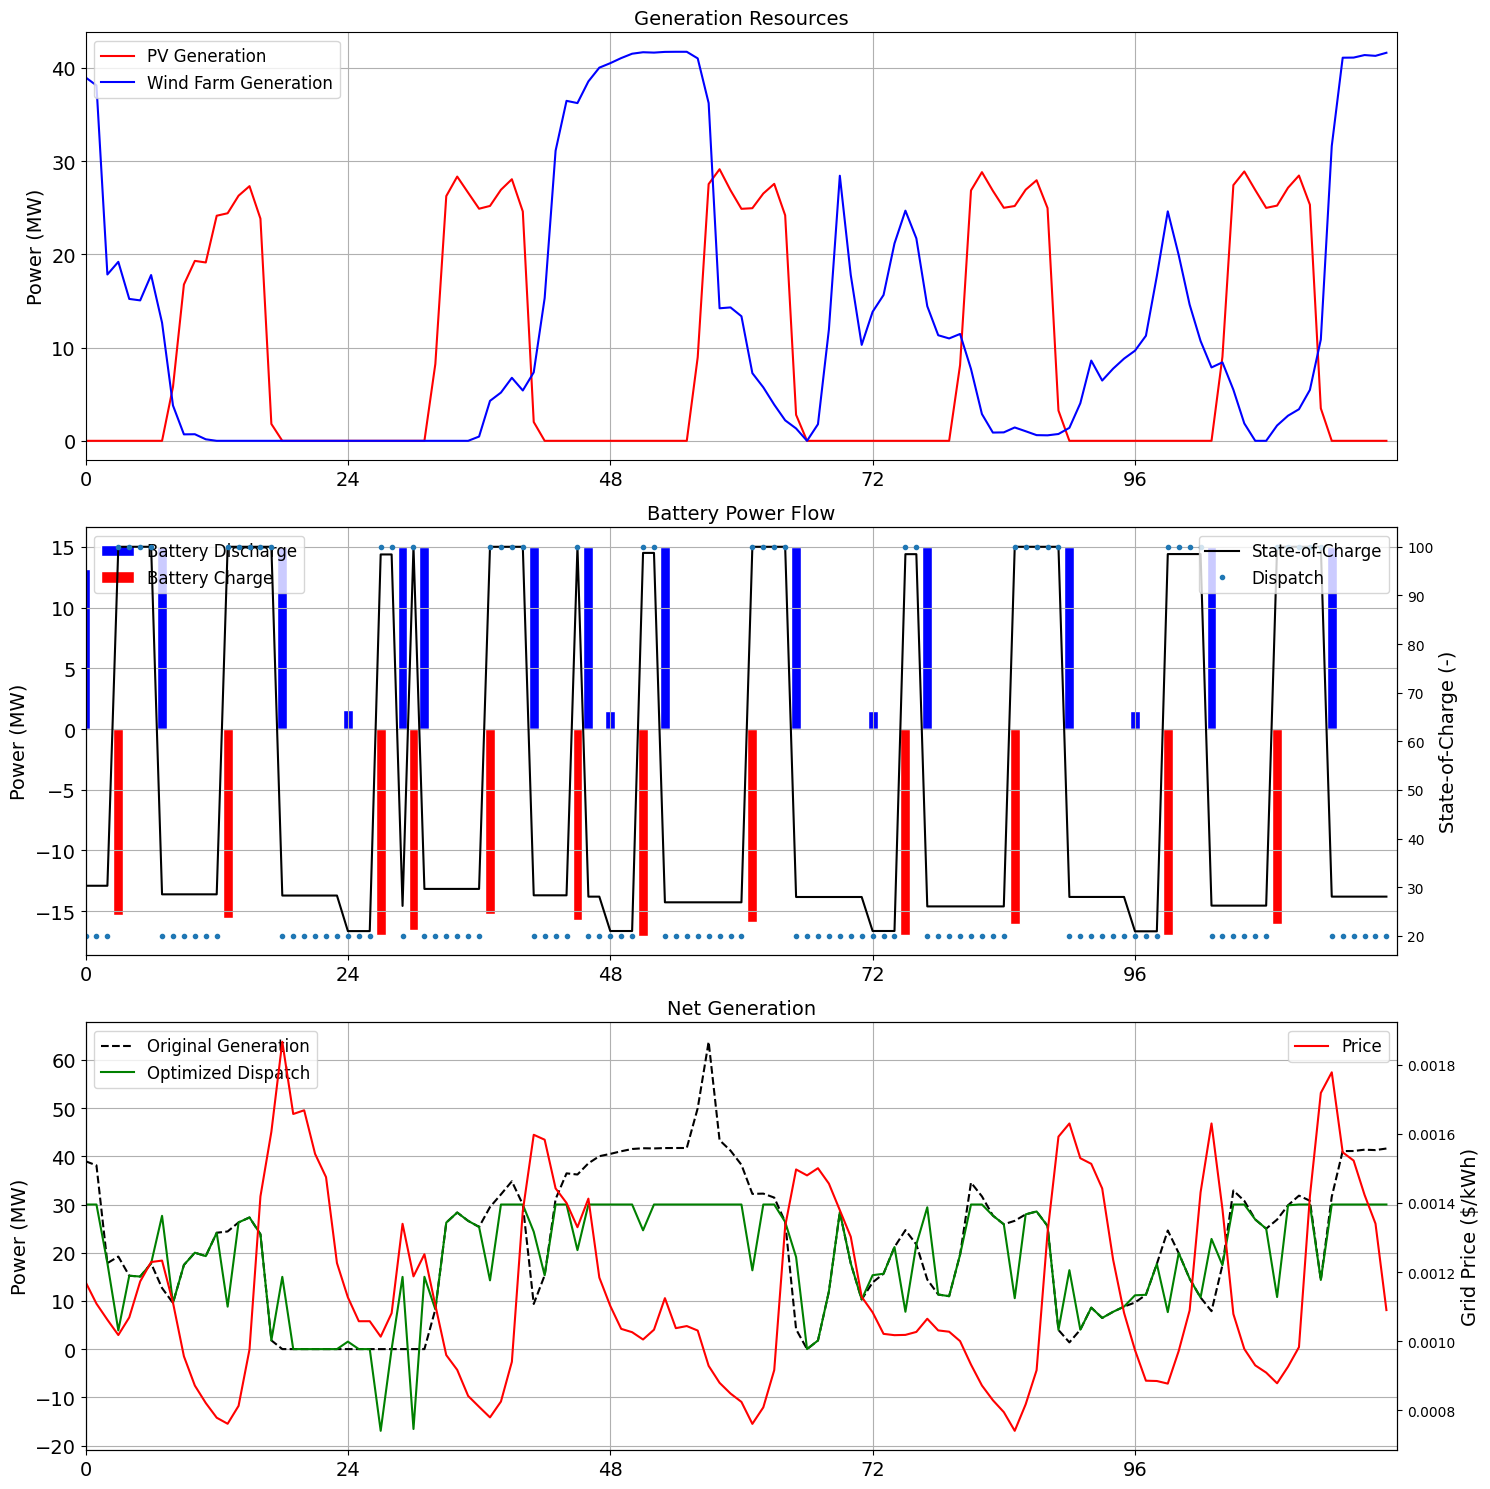

In [9]:
plot_generation_profile(hybrid_plant)